In [21]:
# EDA-1

import pandas as pd
file_path = 'D:\Rakesh\Downloads\BIKE DETAILS.csv'
bike_details = pd.read_csv(file_path)
bike_details.head()


<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
C:\Users\rakes\AppData\Local\Temp\ipykernel_22112\592462317.py:2: SyntaxWarning: invalid escape sequence '\R'
  file_path = 'D:\Rakesh\Downloads\BIKE DETAILS.csv'


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [22]:
bike_details.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [28]:
min_price = bike_details['selling_price'].min()
max_price = bike_details['selling_price'].max()
range_price = max_price - min_price

print(f"Range of Selling Prices: {range_price}")

Range of Selling Prices: 755000


In [32]:
# 1. Range of selling prices in the dataset
selling_price_range = (bike_details['selling_price'].min(), bike_details['selling_price'].max())


In [34]:
# 2. Median selling price
median_selling_price = bike_details['selling_price'].median()
median_selling_price

45000.0

In [35]:
#3 What is the most common seller type?
most_common_seller_type = bike_details['seller_type'].mode()[0]
most_common_seller_type

'Individual'

In [36]:
#4 How many bikes have driven more than 50,000 kilometers?
bikes_over_50k_km = bike_details[bike_details['km_driven'] > 50000].shape[0]
bikes_over_50k_km

170

In [37]:
#5 What is the average km_driven value for each ownership type?
average_km_per_owner = bike_details.groupby('owner')['km_driven'].mean()
average_km_per_owner

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [38]:
#6 What proportion of bikes are from the year 2015 or older?

total_bikes = bike_details.shape[0]
bikes_pre_2015 = bike_details[bike_details['year'] <= 2015].shape[0]
proportion_pre_2015 = bikes_pre_2015 / total_bikes
proportion_pre_2015

0.5664467483506126

In [39]:
#7 What is the trend of missing values across the dataset?
missing_values_trend = bike_details.isnull().sum()
missing_values_percentage = (missing_values_trend / len(bike_details)) * 100

# Combine counts and percentages for a comprehensive overview
missing_values_overview = pd.DataFrame({
    'Missing Count': missing_values_trend,
    'Missing Percentage (%)': missing_values_percentage
})

missing_values_overview

,Missing Count,Missing Percentage (%)
name,0,0.000000
selling_price,0,0.000000
year,0,0.000000
seller_type,0,0.000000
owner,0,0.000000
km_driven,0,0.000000
ex_showroom_price,435,40.999057


In [40]:
#8 What is the highest ex_showroom_price recorded, and for which bike?
if bike_details['ex_showroom_price'].notnull().any():
    highest_ex_showroom_price = bike_details.loc[bike_details['ex_showroom_price'].idxmax(), ['name', 'ex_showroom_price']]
else:
    highest_ex_showroom_price = None

highest_ex_showroom_price

name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object

In [41]:
#9 What is the total number of bikes listed by each seller type?
bikes_per_seller_type = bike_details['seller_type'].value_counts()
bikes_per_seller_type

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [42]:
#10 What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = bike_details[bike_details['owner'] == '1st owner']
selling_price_km_corr = first_owner_bikes[['selling_price', 'km_driven']].corr()

selling_price_km_corr

,selling_price,km_driven
selling_price,1.000000,-0.243482
km_driven,-0.243482,1.000000


In [43]:
#11 Identify and remove outliers in the km_driven column using the IQR method.
Q1 = bike_details['km_driven'].quantile(0.25)
Q3 = bike_details['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers in km_driven
bike_details_no_outliers = bike_details[(bike_details['km_driven'] >= lower_bound) & (bike_details['km_driven'] <= upper_bound)]

# Count of rows removed
rows_removed = bike_details.shape[0] - bike_details_no_outliers.shape[0]

rows_removed, bike_details_no_outliers.shape[0]

(39, 1022)

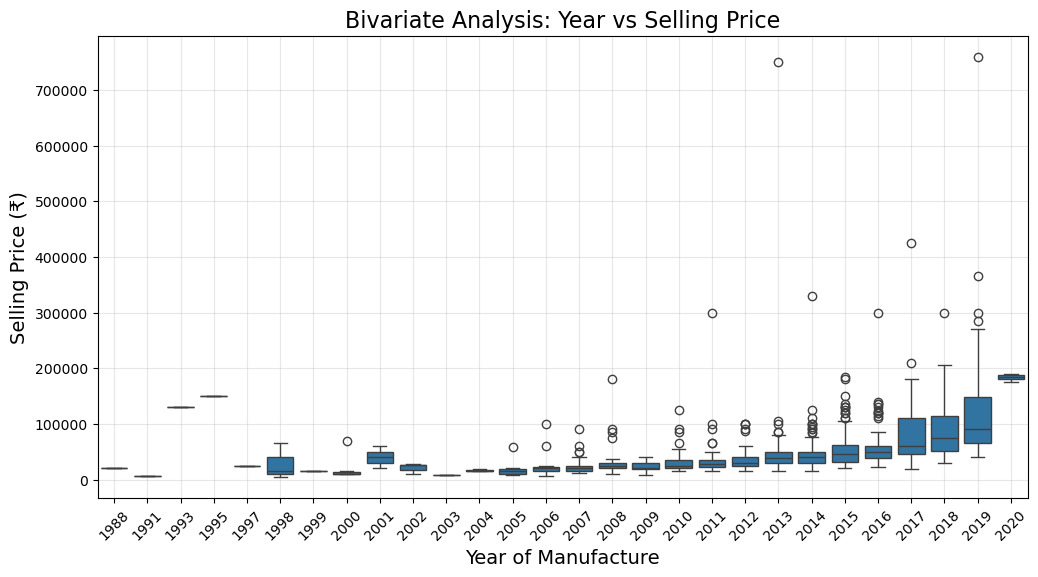

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bivariate analysis: Visualizing the relationship between year and selling_price using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=bike_details_no_outliers['year'], y=bike_details_no_outliers['selling_price'])
plt.title('Bivariate Analysis: Year vs Selling Price', fontsize=16)
plt.xlabel('Year of Manufacture', fontsize=14)
plt.ylabel('Selling Price (₹)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

In [46]:
#13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
from datetime import datetime

# Calculate the bike's age
current_year = datetime.now().year
bike_details_no_outliers['age'] = current_year - bike_details_no_outliers['year']

# Group by age and calculate the average selling price for each age
avg_price_by_age = bike_details_no_outliers.groupby('age')['selling_price'].mean()

# Calculate average depreciation per year (difference in selling price per year of age)
avg_depreciation_per_year = avg_price_by_age.diff().mean()

avg_depreciation_per_year

C:\Users\rakes\AppData\Local\Temp\ipykernel_22112\1057819040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_details_no_outliers['age'] = current_year - bike_details_no_outliers['year']


-6049.382716049382

In [48]:
#14 Which bike names are priced significantly above the average price for their manufacturing year?
# Calculate the average selling price for each year
avg_price_per_year = bike_details_no_outliers.groupby('year')['selling_price'].mean()

# Merge the average prices back to the dataset
bike_details_no_outliers = bike_details_no_outliers.merge(
    avg_price_per_year, on='year', suffixes=('', '_avg_for_year')
)

# Identify bikes significantly above the average price for their manufacturing year
# Define 'significant' as being more than 1.5 times the average price for that year
significant_bikes = bike_details_no_outliers[
    bike_details_no_outliers['selling_price'] > 1.5 * bike_details_no_outliers['selling_price_avg_for_year']
]

# Select relevant details for display
significant_bike_names = significant_bikes[['name', 'year', 'selling_price', 'selling_price_avg_for_year']]
import ace_tools as tools; 
tools.display_dataframe_to_user(name="Significant Bikes Above Average Price", dataframe=significant_bike_names)

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

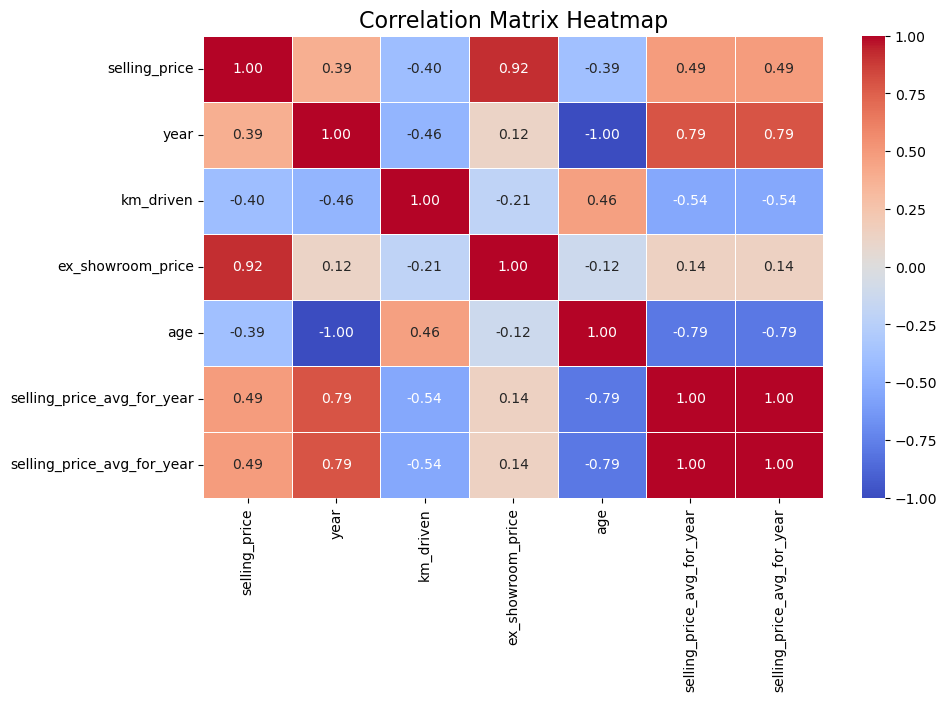

In [49]:
#15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import seaborn as sns
import numpy as np

# Compute the correlation matrix for numeric columns
numeric_columns = bike_details_no_outliers.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [2]:
# EDA-2

import pandas as pd
file_path = 'D:\Rakesh\Downloads\Car Sale.csv'
car_sales_data = pd.read_csv(file_path)
car_sales_data.head()

<>:4: SyntaxWarning: invalid escape sequence '\R'
<>:4: SyntaxWarning: invalid escape sequence '\R'
C:\Users\rakes\AppData\Local\Temp\ipykernel_14304\2089158416.py:4: SyntaxWarning: invalid escape sequence '\R'
  file_path = 'D:\Rakesh\Downloads\Car Sale.csv'


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


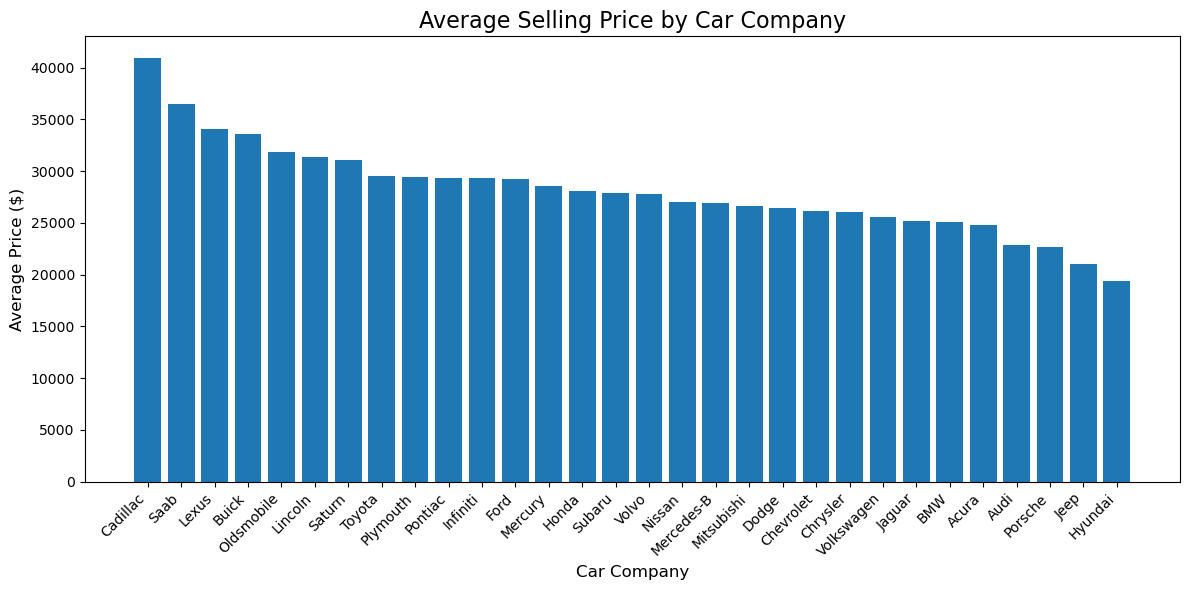

In [5]:
#1 What is the average selling price of cars for each dealer, and how does it compare across different dealers?
# Calculate the average selling price by car company
average_price_by_company = car_sales_data.groupby('Company')['Price ($)'].mean().reset_index()

# Rename columns for clarity
average_price_by_company.columns = ['Company', 'Average_Price']

# Sort by average price to make trends clearer
average_price_by_company = average_price_by_company.sort_values(by='Average_Price', ascending=False)

# Plot the data for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(average_price_by_company['Company'], average_price_by_company['Average_Price'])
plt.title('Average Selling Price by Car Company', fontsize=16)
plt.xlabel('Car Company', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

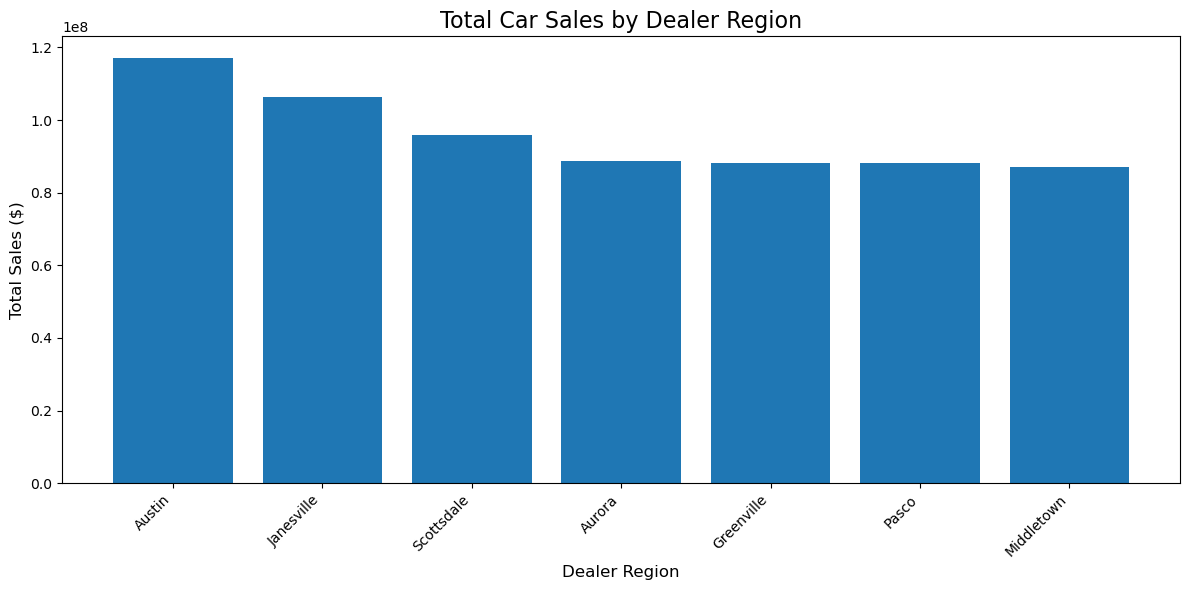

NameError: name 'tools' is not defined

In [8]:
#2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
#Calculate total car sales by dealer region
sales_by_region = car_sales_data.groupby('Dealer_Region')['Price ($)'].sum().reset_index()

# Rename columns for clarity
sales_by_region.columns = ['Dealer_Region', 'Total_Sales']

# Sort by total sales to show trends
sales_by_region = sales_by_region.sort_values(by='Total_Sales', ascending=False)

# Plot the data for visualization
plt.figure(figsize=(12, 6))
plt.bar(sales_by_region['Dealer_Region'], sales_by_region['Total_Sales'])
plt.title('Total Car Sales by Dealer Region', fontsize=16)
plt.xlabel('Dealer Region', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the table to the user
tools.display_dataframe_to_user(name="Car Sales by Dealer Region", dataframe=sales_by_region)

<Figure size 1000x600 with 0 Axes>

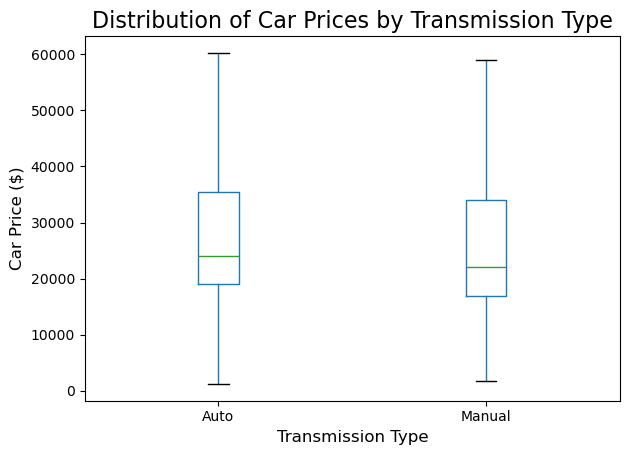

NameError: name 'tools' is not defined

In [9]:
#3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
# Group data by Transmission type and analyze price distribution
price_distribution_by_transmission = car_sales_data.groupby('Transmission')['Price ($)'].describe()

# Extract relevant statistics (25th, 50th, and 75th percentiles)
transmission_price_iqr = price_distribution_by_transmission[['25%', '50%', '75%']].reset_index()

# Add a new column for IQR (Interquartile Range)
transmission_price_iqr['IQR'] = transmission_price_iqr['75%'] - transmission_price_iqr['25%']

# Plot boxplots for the distribution of car prices by transmission type
plt.figure(figsize=(10, 6))
car_sales_data.boxplot(column='Price ($)', by='Transmission', grid=False, showfliers=False)
plt.title('Distribution of Car Prices by Transmission Type', fontsize=16)
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Car Price ($)', fontsize=12)
plt.tight_layout()
plt.show()

# Display the interquartile range table
tools.display_dataframe_to_user(name="Car Price Distribution Statistics by Transmission Type", dataframe=transmission_price_iqr)
 

<Figure size 1400x800 with 0 Axes>

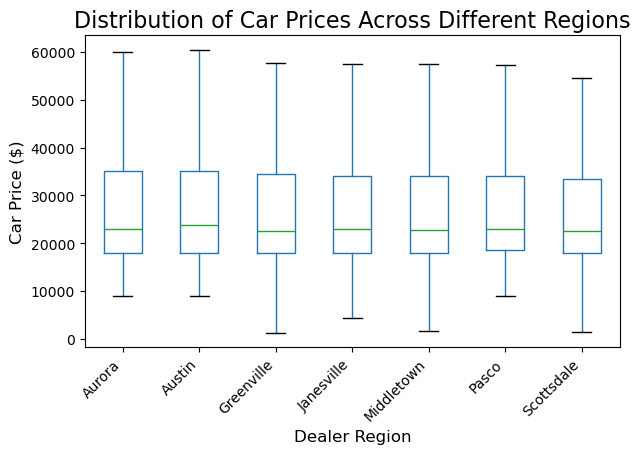

NameError: name 'tools' is not defined

In [10]:
#4 What is the distribution of car prices across different regions?
# Plot boxplots for the distribution of car prices by dealer region
plt.figure(figsize=(14, 8))
car_sales_data.boxplot(column='Price ($)', by='Dealer_Region', grid=False, showfliers=False)
plt.title('Distribution of Car Prices Across Different Regions', fontsize=16)
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Dealer Region', fontsize=12)
plt.ylabel('Car Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate descriptive statistics for car prices by region
price_distribution_by_region = car_sales_data.groupby('Dealer_Region')['Price ($)'].describe()

tools.display_dataframe_to_user(name="Car Price Distribution Across Regions", dataframe=price_distribution_by_region)

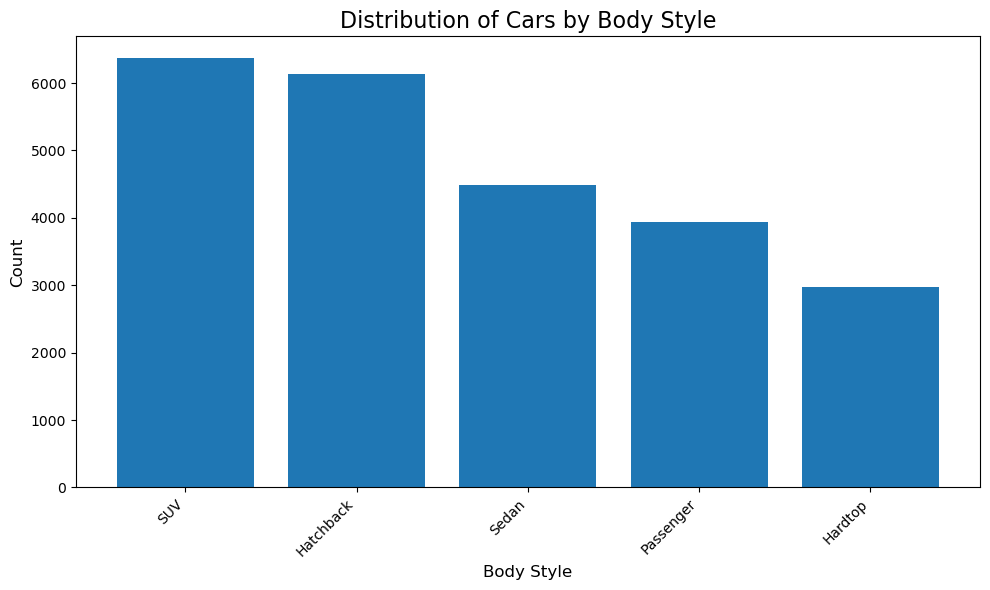

NameError: name 'tools' is not defined

In [11]:
#5 Calculate the distribution of cars based on body styles
body_style_distribution = car_sales_data['Body Style'].value_counts().reset_index()

# Rename columns for clarity
body_style_distribution.columns = ['Body Style', 'Count']

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(body_style_distribution['Body Style'], body_style_distribution['Count'])
plt.title('Distribution of Cars by Body Style', fontsize=16)
plt.xlabel('Body Style', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the distribution table to the user
tools.display_dataframe_to_user(name="Car Distribution by Body Style", dataframe=body_style_distribution)

C:\Users\rakes\AppData\Local\Temp\ipykernel_14304\1328271883.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_gender_income = car_sales_data.groupby(['Gender', 'Income_Range'])['Price ($)'].mean().reset_index()


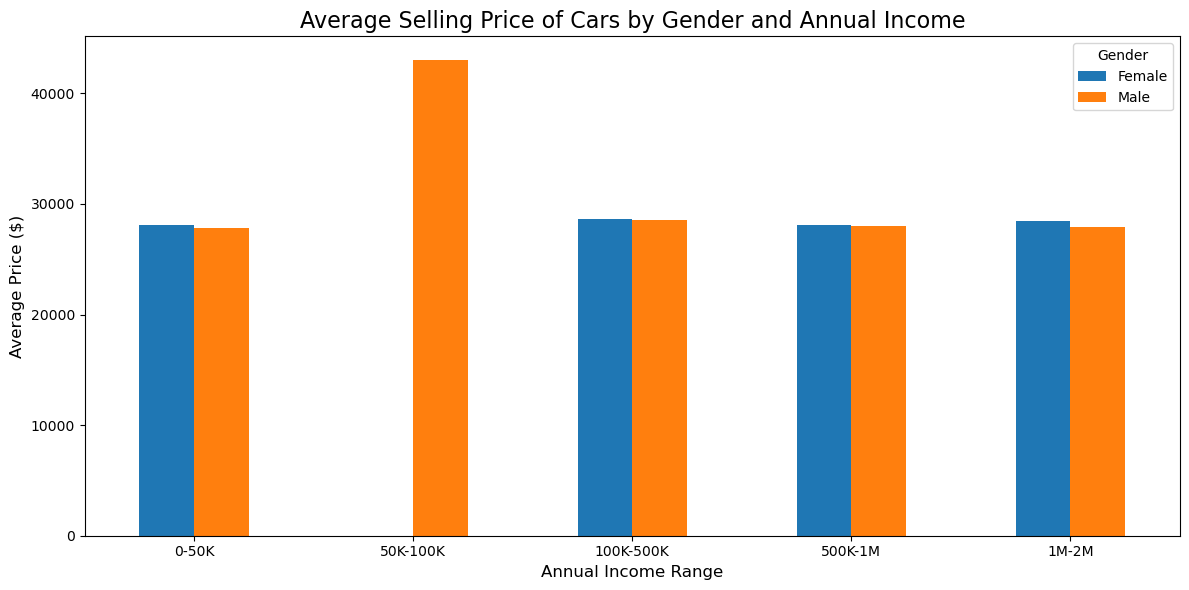

NameError: name 'tools' is not defined

In [12]:
#6 How does the average selling price of cars vary by customer gender and annual income?
# Group by Gender and calculate average selling price for different income ranges
car_sales_data['Income_Range'] = pd.cut(
    car_sales_data['Annual Income'],
    bins=[0, 50000, 100000, 500000, 1000000, 2000000],
    labels=['0-50K', '50K-100K', '100K-500K', '500K-1M', '1M-2M']
)

# Calculate average price by Gender and Income Range
avg_price_gender_income = car_sales_data.groupby(['Gender', 'Income_Range'])['Price ($)'].mean().reset_index()

# Pivot for easier visualization
pivot_table = avg_price_gender_income.pivot(index='Income_Range', columns='Gender', values='Price ($)')

# Plot the data
pivot_table.plot(kind='bar', figsize=(12, 6))
plt.title('Average Selling Price of Cars by Gender and Annual Income', fontsize=16)
plt.xlabel('Annual Income Range', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Display the table for reference
tools.display_dataframe_to_user(name="Average Car Price by Gender and Income Range", dataframe=avg_price_gender_income)

<Figure size 1400x800 with 0 Axes>

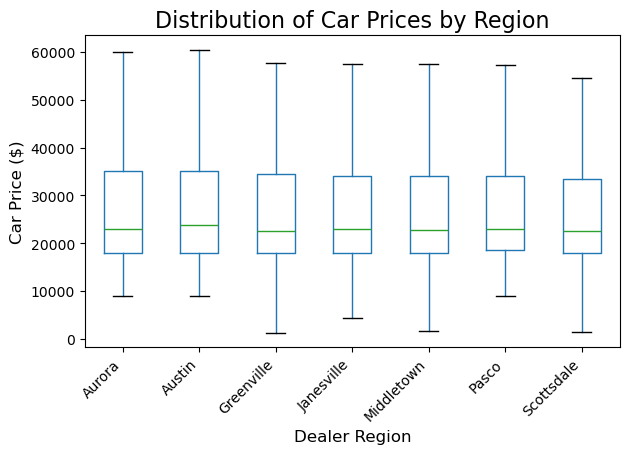

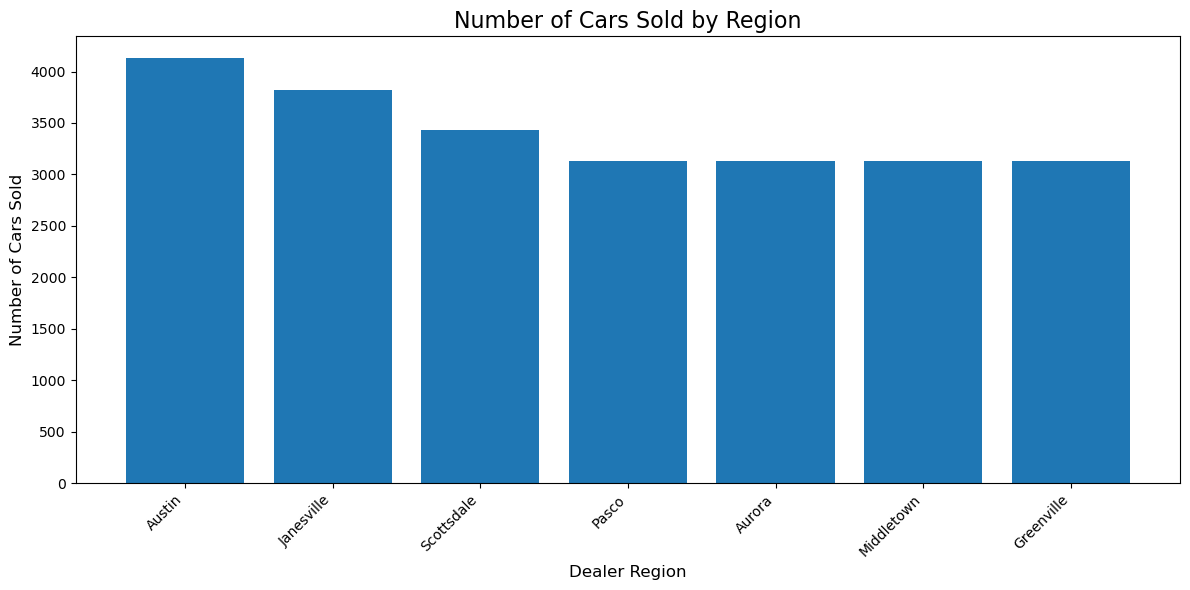

NameError: name 'tools' is not defined

In [13]:
#7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?
# Calculate the distribution of car prices by region
price_distribution_by_region = car_sales_data.groupby('Dealer_Region')['Price ($)'].describe()

# Calculate the number of cars sold by region
cars_sold_by_region = car_sales_data['Dealer_Region'].value_counts().reset_index()

# Rename columns for clarity
cars_sold_by_region.columns = ['Dealer_Region', 'Cars_Sold']

# Plot boxplots for car price distribution by region
plt.figure(figsize=(14, 8))
car_sales_data.boxplot(column='Price ($)', by='Dealer_Region', grid=False, showfliers=False)
plt.title('Distribution of Car Prices by Region', fontsize=16)
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Dealer Region', fontsize=12)
plt.ylabel('Car Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the number of cars sold by region
plt.figure(figsize=(12, 6))
plt.bar(cars_sold_by_region['Dealer_Region'], cars_sold_by_region['Cars_Sold'])
plt.title('Number of Cars Sold by Region', fontsize=16)
plt.xlabel('Dealer Region', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the detailed tables for both analyses
tools.display_dataframe_to_user(name="Car Price Distribution by Region", dataframe=price_distribution_by_region)
tools.display_dataframe_to_user(name="Number of Cars Sold by Region", dataframe=cars_sold_by_region)

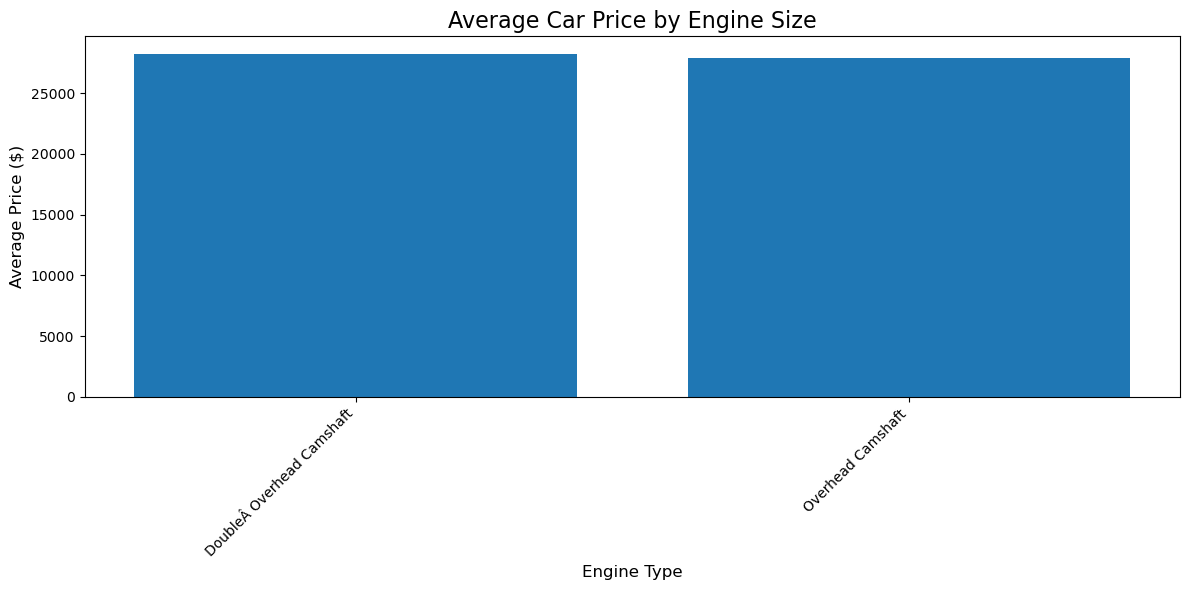

NameError: name 'tools' is not defined

In [14]:
#8 How does the average car price differ between cars with different engine sizes?
# Group by Engine type and calculate the average price
average_price_by_engine = car_sales_data.groupby('Engine')['Price ($)'].mean().reset_index()

# Rename columns for clarity
average_price_by_engine.columns = ['Engine', 'Average_Price']

# Sort by average price to make trends clearer
average_price_by_engine = average_price_by_engine.sort_values(by='Average_Price', ascending=False)

# Plot the data for visualization
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_engine['Engine'], average_price_by_engine['Average_Price'])
plt.title('Average Car Price by Engine Size', fontsize=16)
plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the data table to the user
tools.display_dataframe_to_user(name="Average Car Price by Engine Type", dataframe=average_price_by_engine)


C:\Users\rakes\AppData\Local\Temp\ipykernel_14304\1227811447.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_income = car_sales_data.groupby('Income_Range')['Price ($)'].mean().reset_index()


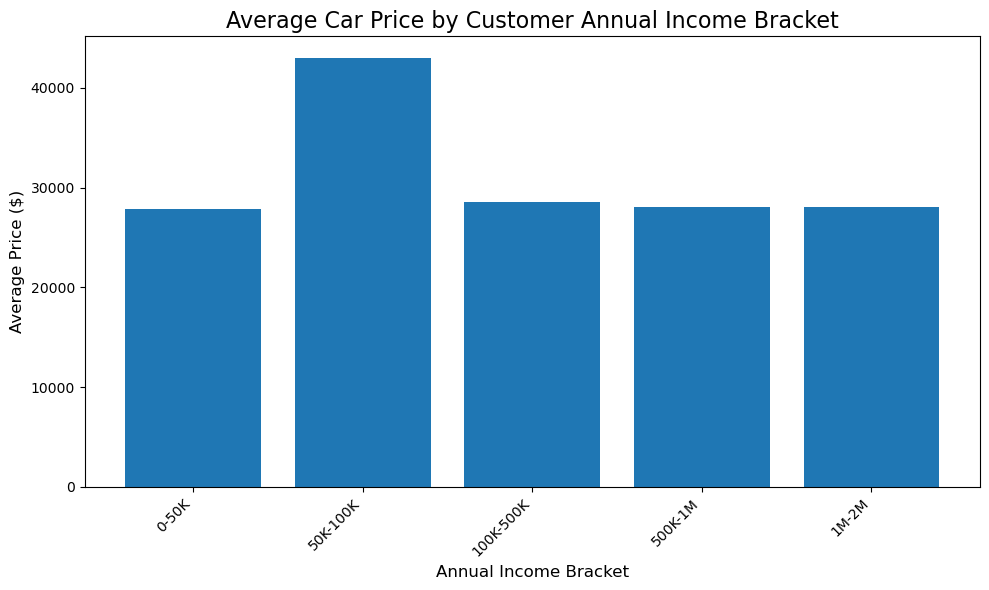

NameError: name 'tools' is not defined

In [15]:
#9 How do car prices vary based on the customer’s annual income bracket?
# Group by Income Range and calculate the average car price
average_price_by_income = car_sales_data.groupby('Income_Range')['Price ($)'].mean().reset_index()

# Rename columns for clarity
average_price_by_income.columns = ['Income_Range', 'Average_Price']

# Sort by income range to visualize trends effectively
average_price_by_income = average_price_by_income.sort_values(by='Income_Range')

# Plot the data for visualization
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_income['Income_Range'], average_price_by_income['Average_Price'])
plt.title('Average Car Price by Customer Annual Income Bracket', fontsize=16)
plt.xlabel('Annual Income Bracket', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the data table to the user
tools.display_dataframe_to_user(name="Average Car Price by Annual Income Bracket", dataframe=average_price_by_income)

<Figure size 1200x600 with 0 Axes>

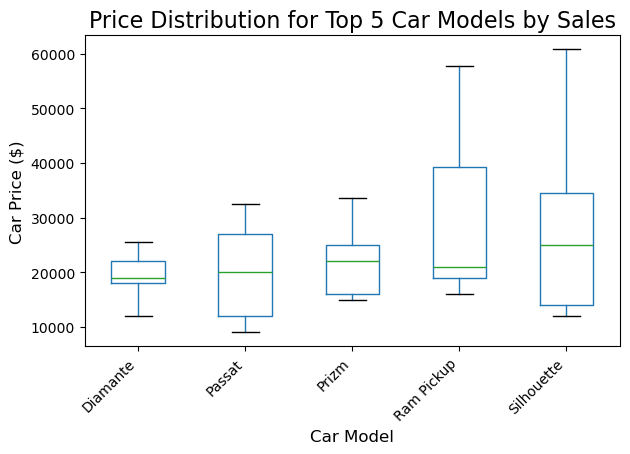

NameError: name 'tools' is not defined

In [16]:
#10 What are the top 5 car models with the highest number of sales, and how does their price distribution look?
# Calculate the top 5 car models by sales count
top_5_models = car_sales_data['Model'].value_counts().head(5).reset_index()
top_5_models.columns = ['Model', 'Sales_Count']

# Filter the data for these top 5 models
top_5_models_data = car_sales_data[car_sales_data['Model'].isin(top_5_models['Model'])]

# Plot the price distribution for these top 5 models using a boxplot
plt.figure(figsize=(12, 6))
top_5_models_data.boxplot(column='Price ($)', by='Model', grid=False, showfliers=False)
plt.title('Price Distribution for Top 5 Car Models by Sales', fontsize=16)
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Car Model', fontsize=12)
plt.ylabel('Car Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the sales count table
tools.display_dataframe_to_user(name="Top 5 Car Models by Sales Count", dataframe=top_5_models)

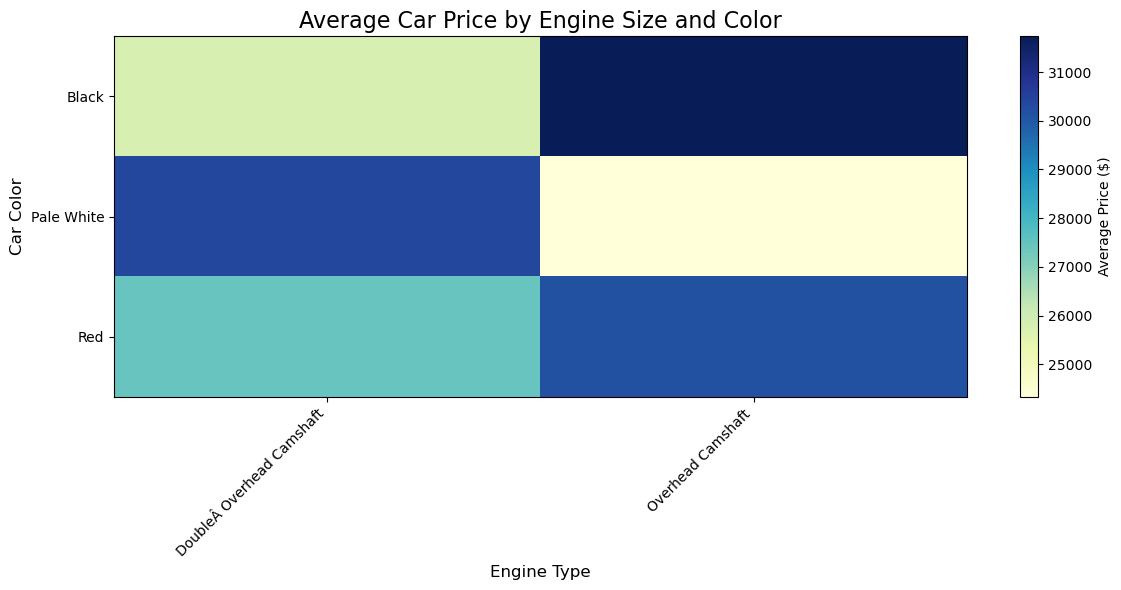

NameError: name 'tools' is not defined

In [17]:
#11 How does car price vary with engine size across different car colors, and which colors have the highest price variation?
# Group by Engine and Color, calculate average price
average_price_by_engine_color = car_sales_data.groupby(['Engine', 'Color'])['Price ($)'].mean().reset_index()

# Calculate price variation (standard deviation) by color
price_variation_by_color = car_sales_data.groupby('Color')['Price ($)'].std().reset_index()
price_variation_by_color.columns = ['Color', 'Price_Variation']

# Identify the color with the highest price variation
highest_variation_color = price_variation_by_color.sort_values(by='Price_Variation', ascending=False).iloc[0]

# Visualize average price by Engine and Color using a pivot table
engine_color_pivot = average_price_by_engine_color.pivot(index='Color', columns='Engine', values='Price ($)')

# Plot heatmap for average prices
plt.figure(figsize=(12, 6))
plt.imshow(engine_color_pivot, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Average Price ($)')
plt.title('Average Car Price by Engine Size and Color', fontsize=16)
plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Car Color', fontsize=12)
plt.xticks(range(len(engine_color_pivot.columns)), engine_color_pivot.columns, rotation=45, ha='right')
plt.yticks(range(len(engine_color_pivot.index)), engine_color_pivot.index)
plt.tight_layout()
plt.show()

# Display detailed tables
tools.display_dataframe_to_user(name="Price Variation by Color", dataframe=price_variation_by_color)
tools.display_dataframe_to_user(name="Average Price by Engine and Color", dataframe=average_price_by_engine_color)

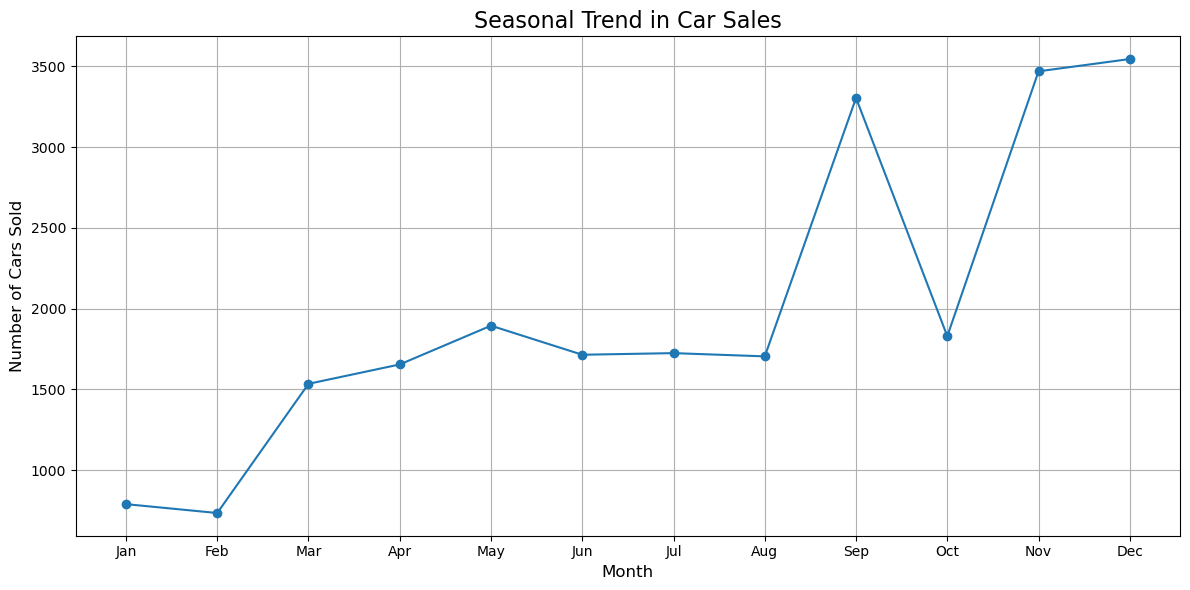

NameError: name 'tools' is not defined

In [18]:
#12 Is there any seasonal trend in car sales based on the date of sale?
# Convert the 'Date' column to datetime format for easier analysis
car_sales_data['Date'] = pd.to_datetime(car_sales_data['Date'])

# Extract month and year from the 'Date' column
car_sales_data['Month'] = car_sales_data['Date'].dt.month
car_sales_data['Year'] = car_sales_data['Date'].dt.year

# Calculate total car sales by month
monthly_sales = car_sales_data.groupby('Month').size().reset_index(name='Sales_Count')

# Plot the seasonal trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales_Count'], marker='o')
plt.title('Seasonal Trend in Car Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.tight_layout()
plt.show()

# Display the monthly sales table
tools.display_dataframe_to_user(name="Monthly Car Sales Count", dataframe=monthly_sales)

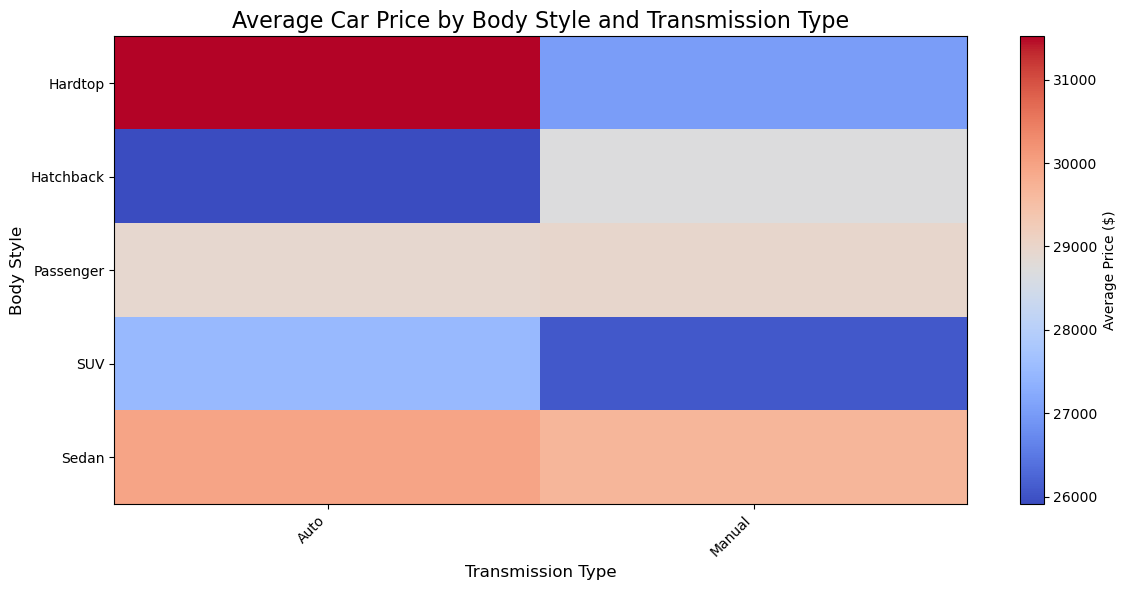

NameError: name 'tools' is not defined

In [19]:
#13 How does the car price distribution change when considering different combinations of body style and transmission type?
# Group by Body Style and Transmission, calculate average and distribution of prices
price_distribution_by_body_transmission = car_sales_data.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()

# Extract relevant statistics for visualization
price_summary = price_distribution_by_body_transmission[['mean', 'std', '25%', '50%', '75%']].reset_index()

# Visualize the average price by Body Style and Transmission type
pivot_table = price_summary.pivot(index='Body Style', columns='Transmission', values='mean')

plt.figure(figsize=(12, 6))
plt.imshow(pivot_table, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Average Price ($)')
plt.title('Average Car Price by Body Style and Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Body Style', fontsize=12)
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=45, ha='right')
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.tight_layout()
plt.show()

# Display a detailed table
tools.display_dataframe_to_user(name="Car Price Distribution by Body Style and Transmission Type", dataframe=price_summary)

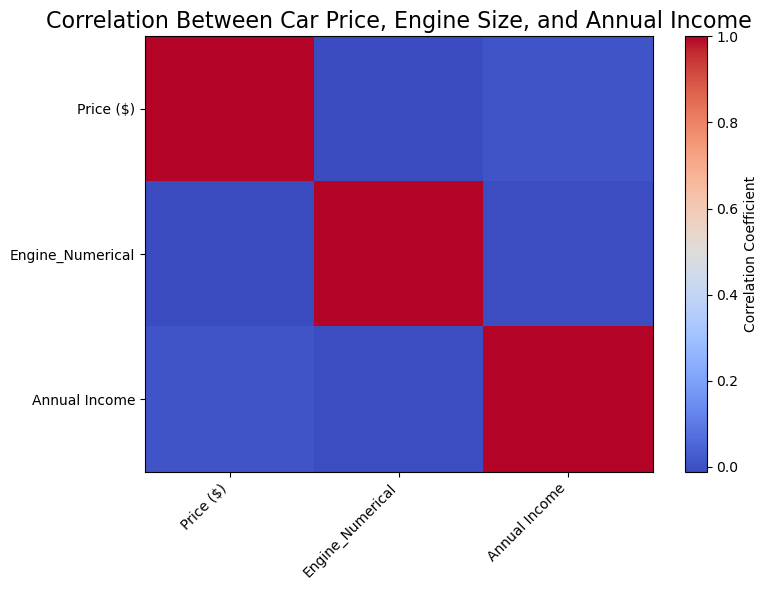

NameError: name 'tools' is not defined

In [20]:
#14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
# Encode the 'Engine' column as a numerical feature for correlation analysis
car_sales_data['Engine_Numerical'] = car_sales_data['Engine'].factorize()[0]

# Select relevant features for correlation analysis
correlation_data = car_sales_data[['Price ($)', 'Engine_Numerical', 'Annual Income']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Between Car Price, Engine Size, and Annual Income', fontsize=16)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

# Display the correlation matrix as a table
tools.display_dataframe_to_user(name="Correlation Between Price, Engine Size, and Annual Income", dataframe=correlation_matrix)

In [ ]:
#15 How does the average car price vary across different car models and engine types?
 # Group data by Dealer Region to analyze car sales trends
regional_trends = car_sales_data.groupby('Dealer_Region').agg({
    'Price ($)': ['mean', 'sum', 'std'],  # Average, total, and price variability
    'Car_id': 'count'                    # Total number of cars sold
}).reset_index()

# Flatten column names for better readability
regional_trends.columns = ['Dealer_Region', 'Average_Price', 'Total_Sales_Value', 'Price_Std_Dev', 'Cars_Sold']

# Sort by total sales value for better insights
regional_trends = regional_trends.sort_values(by='Total_Sales_Value', ascending=False)

# Display the trends in a table
tools.display_dataframe_to_user(name="Regional Trends in Car Sales", dataframe=regional_trends)

# Plot the total sales value and number of cars sold by region
plt.figure(figsize=(12, 6))
plt.bar(regional_trends['Dealer_Region'], regional_trends['Total_Sales_Value'], alpha=0.6, label='Total Sales Value')
plt.plot(regional_trends['Dealer_Region'], regional_trends['Cars_Sold'], color='red', marker='o', label='Cars Sold')
plt.title('Regional Trends in Car Sales', fontsize=16)
plt.xlabel('Dealer Region', fontsize=12)
plt.ylabel('Sales Metrics', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#EDA-3
import pandas as pd

# Load the uploaded CSV file to inspect its content
file_path = 'D:\Rakesh\Downloads/amazon (1).csv'
data = pd.read_csv(file_path)

#1 What is the average rating for each product category?
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')  # Convert ratings to numeric
data['category_main'] = data['category'].str.split('|').str[0]  # Extract the main category

# Calculate the average rating for each main category
average_ratings = data.groupby('category_main')['rating'].mean().reset_index()
average_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)

import ace_tools as tools; tools.display_dataframe_to_user(name="Average Ratings by Product Category", dataframe=average_ratings)

In [ ]:
#2 What are the top rating_count products by category?
# Convert rating_count to numeric by removing commas and converting to integers
data['rating_count'] = pd.to_numeric(data['rating_count'].str.replace(',', ''), errors='coerce')

# Identify the top product by rating_count for each category
top_products_by_category = data.loc[data.groupby('category_main')['rating_count'].idxmax()][
    ['category_main', 'product_name', 'rating_count', 'rating']
]

top_products_by_category.sort_values(by='category_main', inplace=True)

tools.display_dataframe_to_user(name="Top Rating Count Products by Category", dataframe=top_products_by_category)


<>:6: SyntaxWarning: invalid escape sequence '\R'
<>:6: SyntaxWarning: invalid escape sequence '\R'
C:\Users\rakes\AppData\Local\Temp\ipykernel_22472\2149871879.py:6: SyntaxWarning: invalid escape sequence '\R'
  file_path = 'D:\Rakesh\Downloads/amazon (1).csv'


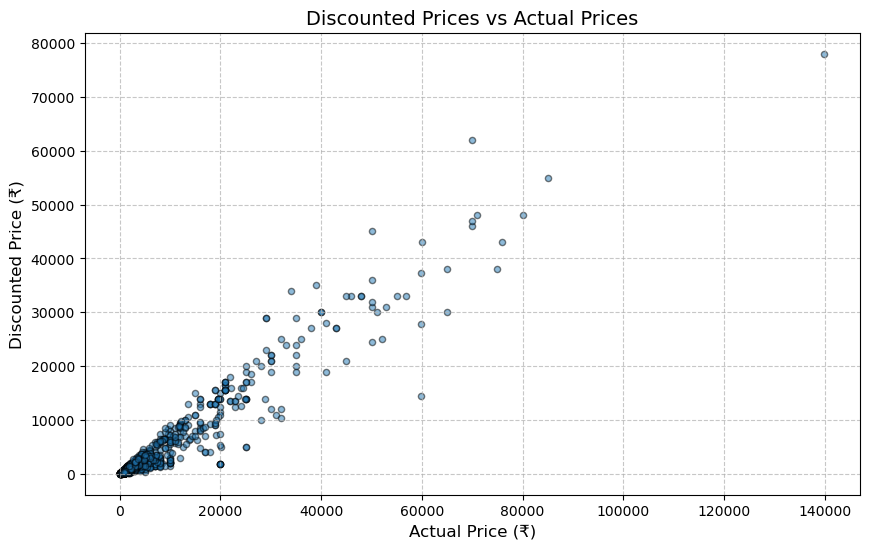

In [11]:
#3 What is the distribution of discounted prices vs. actual prices?
import matplotlib.pyplot as plt
import pandas as pd

# Load the uploaded CSV file to inspect its content
file_path = 'D:\Rakesh\Downloads/amazon (1).csv'
data = pd.read_csv(file_path)

# Convert price columns to numeric after removing non-numeric characters
data['discounted_price'] = pd.to_numeric(data['discounted_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
data['actual_price'] = pd.to_numeric(data['actual_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

# Plot the distribution of discounted prices vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(data['actual_price'], data['discounted_price'], alpha=0.5, edgecolor='k', s=20)
plt.title('Discounted Prices vs Actual Prices', fontsize=14)
plt.xlabel('Actual Price (₹)', fontsize=12)
plt.ylabel('Discounted Price (₹)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#4 How does the average discount percentage vary across categories?
data['discount_percentage'] = pd.to_numeric(data['discount_percentage'].str.replace('%', ''), errors='coerce')

# Calculate the average discount percentage for each category
average_discounts = data.groupby('category_main')['discount_percentage'].mean().reset_index()
average_discounts.rename(columns={'discount_percentage': 'average_discount_percentage'}, inplace=True)

tools.display_dataframe_to_user(name="Average Discount Percentage by Category", dataframe=average_discounts)


In [ ]:
#5 What are the most popular product names?
# Identify the most popular products based on rating_count
most_popular_products = data.nlargest(10, 'rating_count')[['product_name', 'rating_count', 'rating']]

tools.display_dataframe_to_user(name="Most Popular Products", dataframe=most_popular_products)

In [ ]:
#6 What are the most popular product keywords?
from collections import Counter
import re

# Extract keywords from product names
all_keywords = data['product_name'].dropna().apply(lambda x: re.findall(r'\b\w+\b', x)).sum()
keyword_counts = Counter(all_keywords)

# Get the top 10 most common keywords
most_common_keywords = pd.DataFrame(keyword_counts.most_common(10), columns=['Keyword', 'Count'])

tools.display_dataframe_to_user(name="Most Popular Product Keywords", dataframe=most_common_keywords)

In [ ]:
#7 What are the most popular product reviews?
# Extract the reviews with the highest rating_count
most_popular_reviews = data.nlargest(10, 'rating_count')[['product_name', 'review_title', 'review_content', 'rating_count']]

tools.display_dataframe_to_user(name="Most Popular Product Reviews", dataframe=most_popular_reviews)

In [ ]:
#8 What is the correlation between discounted_price and rating?
# Calculate the correlation between discounted_price and rating
correlation = data[['discounted_price', 'rating']].corr().iloc[0, 1]
correlation

In [ ]:
#9 What are the Top 5 categories based on the highest ratings?
# Get the top 5 categories based on the highest average ratings
top_categories_by_rating = average_ratings.nlargest(5, 'average_rating')

tools.display_dataframe_to_user(name="Top 5 Categories Based on Highest Ratings", dataframe=top_categories_by_rating)

In [ ]:
#10 Identify any potential areas for improvement or optimization based on the data analysis?
'''''
1. Products with Low Ratings
Observation: Certain categories or products have relatively low ratings.
Action: Investigate customer feedback in the reviews to identify specific issues such as quality, functionality, or delivery. Work with vendors to improve product offerings.
2. Discount Optimization
Observation: A weak correlation (0.12) between discounted prices and ratings suggests that discounts may not strongly influence customer satisfaction.
Action: Reevaluate discount strategies and focus on providing value through quality improvements or bundled offers instead of aggressive discounting.
3. Categories with Lower Ratings
Observation: Categories like "Car & Motorbike" and "Home & Kitchen" have lower average ratings compared to others.
Action: Identify underperforming products in these categories and analyze reviews to uncover recurring issues (e.g., durability, usability). Address these problems with suppliers.
4. Keyword Usage in Product Names
Observation: Keywords such as "with," "for," and "Black" are frequently used but may lack differentiation or specificity.
Action: Enhance product titles with unique, descriptive keywords to improve searchability and distinguish products.
5. Popular Reviews and Rating Distribution
Observation: Popular reviews are often generic (e.g., "value for money") and may not provide actionable insights for potential buyers.
Action: Encourage detailed reviews by offering incentives (e.g., discounts on future purchases) for providing specific feedback about the product's pros and cons.
6. High Discount but Low Rating Count
Observation: Some products may offer high discounts but fail to attract enough reviews or ratings.
Action: Promote these products through marketing campaigns or include them in bundles to increase visibility and purchase volume.
7. Review Analysis for Low-Performing Products
Observation: Products with high review counts but mediocre ratings (e.g., below 4 stars) indicate potential dissatisfaction.
Action: Dive into reviews to identify common pain points and address them through better quality control or design changes.
8. Category-Specific Insights
Observation: Categories like "Office Products" and "Toys & Games" perform well in ratings.
Action: Use these categories as benchmarks to identify what works well (e.g., quality, price, or features) and replicate these strategies across other underperforming categories.
9. Improve Correlation Between Discounts and Satisfaction
Observation: Discounts do not significantly impact ratings.
Action: Complement discounts with additional value propositions, such as extended warranties, free shipping, or loyalty points.
10. Enhanced User Experience
Observation: High rating counts are concentrated in a few products.
Action: Diversify product visibility on e-commerce platforms through better recommendations, featured listings, or cross-category promotions.

In [1]:
#EDA-4
import pandas as pd

# Load the uploaded file to check its contents
file_path = 'D:\Rakesh\Downloads/spotify.csv'
spotify_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
spotify_data.head()

<>:5: SyntaxWarning: invalid escape sequence '\R'
<>:5: SyntaxWarning: invalid escape sequence '\R'
C:\Users\rakes\AppData\Local\Temp\ipykernel_10212\2698702933.py:5: SyntaxWarning: invalid escape sequence '\R'
  file_path = 'D:\Rakesh\Downloads/spotify.csv'


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [2]:
#1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?
null_values = spotify_data.isnull().sum()

# Checking for duplicate rows
duplicate_rows = spotify_data.duplicated().sum()

# Handling null values if any are present
if null_values.sum() > 0:
    spotify_data.fillna("Unknown", inplace=True)

# Dropping duplicate rows if any are present
if duplicate_rows > 0:
    spotify_data.drop_duplicates(inplace=True)

# Summarizing the operations
{
    "Null Values Before Handling": null_values,
    "Duplicate Rows Before Handling": duplicate_rows,
    "Null Values After Handling": spotify_data.isnull().sum(),
    "Duplicate Rows After Handling": spotify_data.duplicated().sum()
}

{'Null Values Before Handling': Artist           0
 Track Name       0
 Popularity       0
 Duration (ms)    0
 Track ID         0
 dtype: int64,
 'Duplicate Rows Before Handling': 27,
 'Null Values After Handling': Artist           0
 Track Name       0
 Popularity       0
 Duration (ms)    0
 Track ID         0
 dtype: int64,
 'Duplicate Rows After Handling': 0}

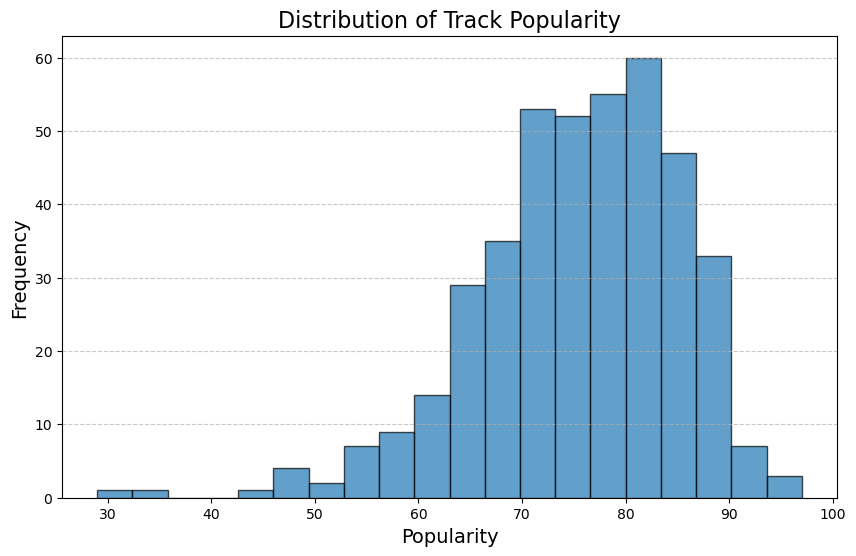

In [3]:
#2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
import matplotlib.pyplot as plt

# Plotting the distribution of popularity
plt.figure(figsize=(10, 6))
plt.hist(spotify_data['Popularity'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Track Popularity', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

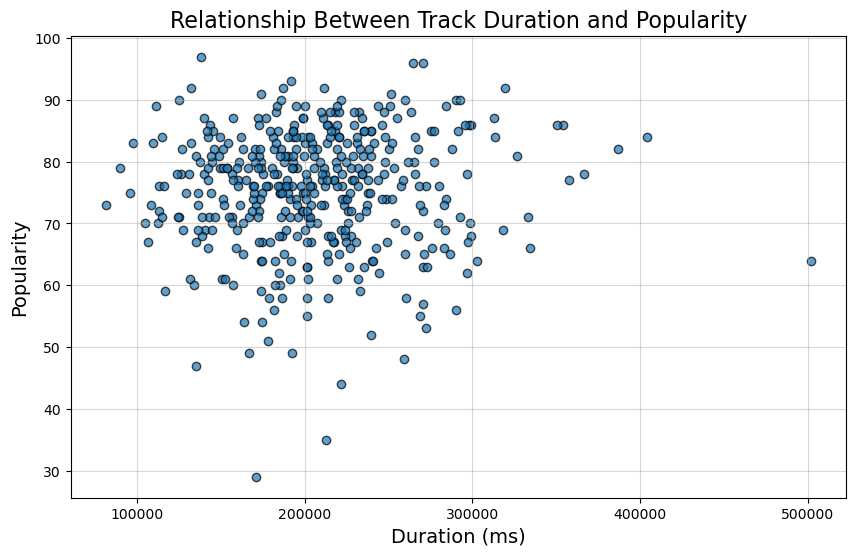

In [4]:
#3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
# Scatter plot to explore the relationship between popularity and duration of tracks
plt.figure(figsize=(10, 6))
plt.scatter(spotify_data['Duration (ms)'], spotify_data['Popularity'], alpha=0.7, edgecolor='k')
plt.title('Relationship Between Track Duration and Popularity', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

C:\Users\rakes\AppData\Local\Temp\ipykernel_10212\3741845780.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=spotify_data['Artist'], order=artist_track_counts.index, palette='viridis')


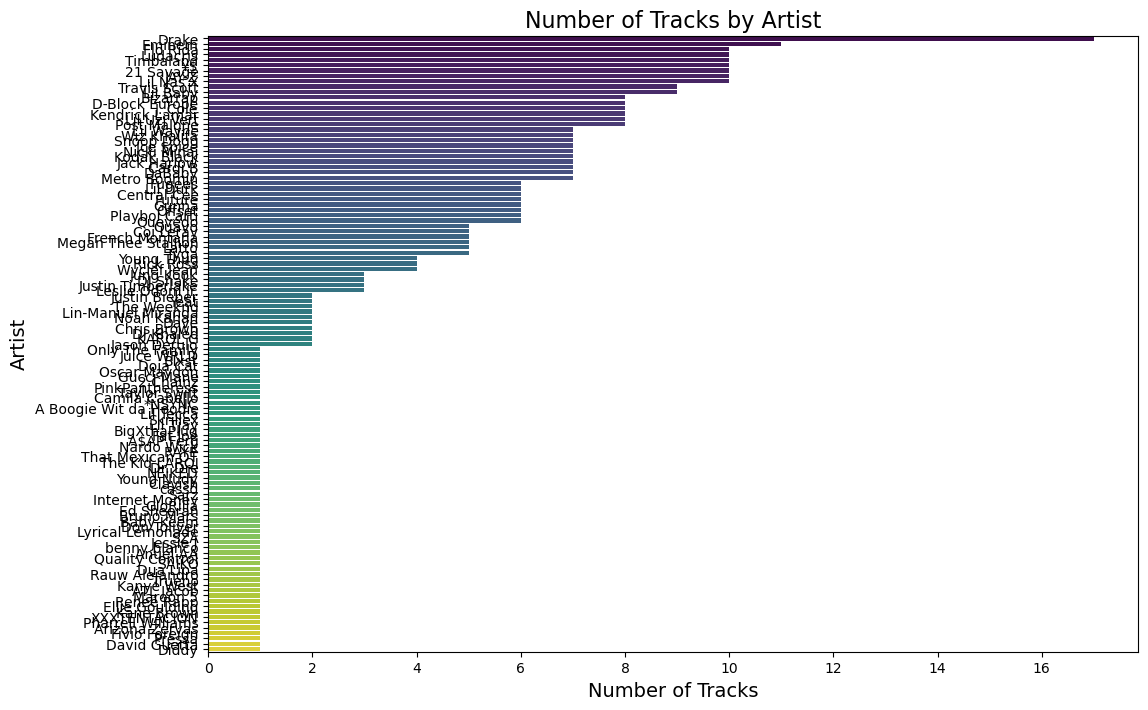

Artist
Drake    17
Name: count, dtype: int64

In [5]:
#4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
import seaborn as sns

# Counting the number of tracks for each artist
artist_track_counts = spotify_data['Artist'].value_counts()

# Plotting the count of tracks for each artist
plt.figure(figsize=(12, 8))
sns.countplot(y=spotify_data['Artist'], order=artist_track_counts.index, palette='viridis')
plt.title('Number of Tracks by Artist', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.show()

# Displaying the artist with the highest number of tracks
artist_track_counts.head(1)

In [7]:
#5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
 # Identifying the top 5 least popular tracks
least_popular_tracks = spotify_data.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]

# Displaying the results
print(least_popular_tracks)

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [10]:
#6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
# Calculating the average popularity for each artist
artist_avg_popularity = spotify_data.groupby('Artist')['Popularity'].mean()

# Selecting the top 5 most popular artists based on the total number of tracks
top_5_artists = spotify_data['Artist'].value_counts().head(5).index

# Filtering the average popularity for the top 5 artists
top_5_avg_popularity = artist_avg_popularity.loc[top_5_artists].sort_values(ascending=False)

# Displaying the results to the user
top_5_avg_popularity

Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64

In [11]:
# Identifying the most popular track for each of the top 5 artists
top_5_most_popular_tracks = (
    spotify_data[spotify_data['Artist'].isin(top_5_artists)]
    .sort_values(['Artist', 'Popularity'], ascending=[True, False])
    .groupby('Artist')
    .first()[['Track Name', 'Popularity']]
)

# Displaying the results to the user
top_5_most_popular_tracks.reset_index()

,Artist,Track Name,Popularity
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
1,Eminem,Without Me,90
2,Flo Rida,Low (feat. T-Pain),84
3,Ludacris,My Chick Bad,67
4,Timbaland,The Way I Are,85


In [14]:
#8 Visualize relationships between multiple numerical variables simultaneously using a pair plot.
import matplotlib.pyplot as plt
# Pair plot using Seaborn for numerical variables (Popularity and Duration (ms))
sns.pairplot(numerical_data, diag_kind='hist', height=2.5)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=16)
plt.show()

NameError: name 'numerical_data' is not defined

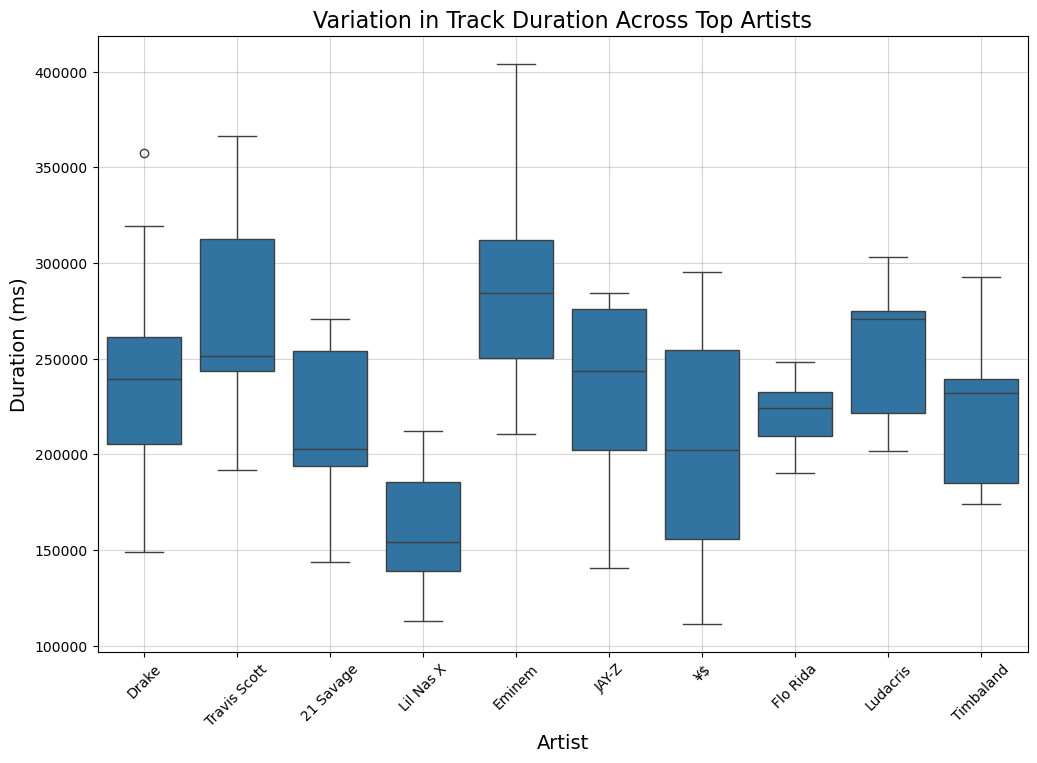

In [15]:
#9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
# Box plot to explore variation in track duration across different artists
plt.figure(figsize=(12, 8))
top_artists = spotify_data['Artist'].value_counts().head(10).index  # Top 10 artists by track count
sns.boxplot(data=spotify_data[spotify_data['Artist'].isin(top_artists)],
            x='Artist', y='Duration (ms)')
plt.title('Variation in Track Duration Across Top Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()

C:\Users\rakes\AppData\Local\Temp\ipykernel_10212\1336407447.py:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=spotify_data[spotify_data['Artist'].isin(top_artists)],


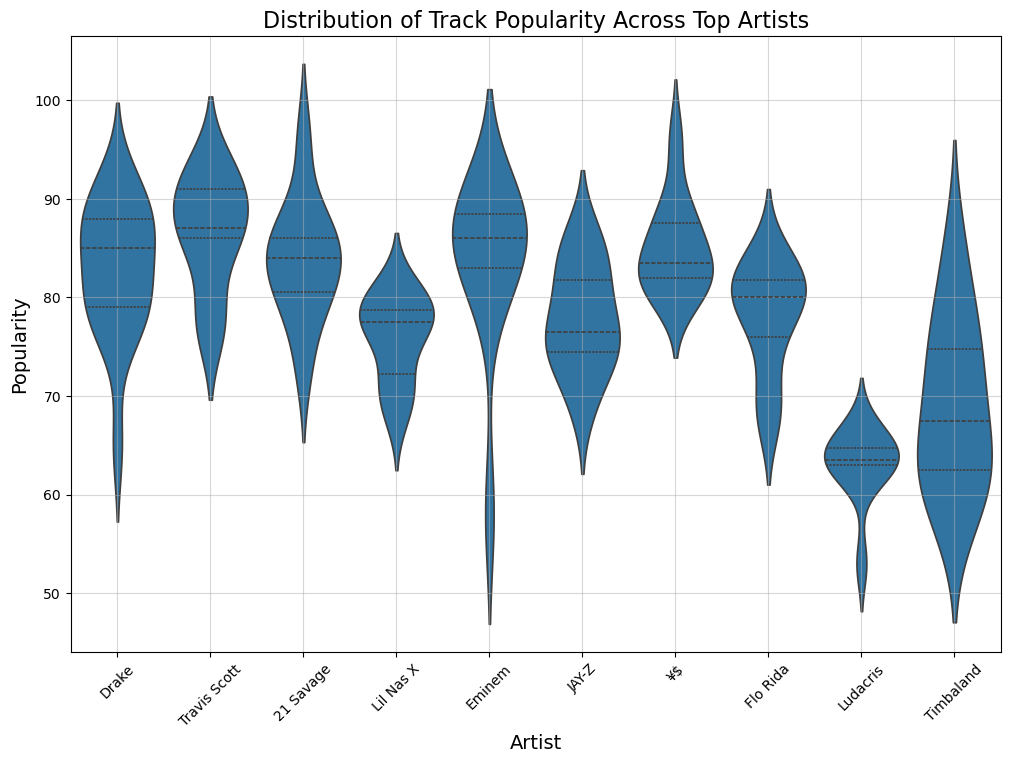

In [16]:
#10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
# Violin plot to show the distribution of track popularity for different artists
plt.figure(figsize=(12, 8))
sns.violinplot(data=spotify_data[spotify_data['Artist'].isin(top_artists)],
               x='Artist', y='Popularity', inner='quartile', scale='width')
plt.title('Distribution of Track Popularity Across Top Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()